# Natural Language Processing

# Importing dependencies

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing dataset

In [8]:
# delimiter should be specified by handling .tsv file in read_csv() method
# quoting=3 to ignore "" to avoid processing/parsing/execution errors
dataset = pd.read_csv(
    'Natural_Language_Processing/Restaurant_Reviews.tsv',
    delimiter="\t",
    quoting=3
)

In [9]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


# Cleaning text

In [43]:
# library allowing stemming on words
import re

# library allowing to download lists of stopwords
import nltk

# download stopwords
nltk.download('stopwords')

# import stopwords
from nltk.corpus import stopwords

# import stemmer
# Stemming - process of taking relevant roots of the words which indicate what this word means
from nltk.stem.porter import PorterStemmer

# creating new list, initialized as empty list, that will contain all cleaned  reviews
corpus = [ ]
stop_words = stopwords.words('english')
stop_words.remove('not')
ps = PorterStemmer()

# cleaning each review in dataset, total 1000 reviews
for i in range(0,1000):
    review = dataset['Review'][i]
    # filtering only letters to remove punctuation marks
    review =  re.sub(pattern='[^a-zA-Z]', repl=' ', string=review) # replaces each non-letter symbol by whitespace
    # lowercasing
    review = review.lower()

    # splitting into separate words
    words = review.split()

    # stemming
    # extracting relevant root of word (ex.loved -> love)
    # removing stopwords
    words = [ps.stem(word) for word in words  if not word in set(stop_words)]

    # joining words back into review via space
    review = ' '.join(words )

    # adding cleaned review to corpus
    corpus.append(review )

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yevgeniya_li/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
print(corpus[1])

crust not good


In [45]:
len(stop_words)

178

In [46]:
'not' in stop_words

False

## Creating Bag-Of-Words model
Creating sparsed matrix, each row corresponds to one of review from corpus and represents vector of zeros of length of all words in all reviews in corpus

Values in this vector is 0 if word of the column is not in this review of the row and 1 if word of the column is in this review of the row

Process of creating these columns in vector corresponding to each of the word in the review is called **Tokenization**

In [47]:
# library providing tokenization
from sklearn.feature_extraction.text import CountVectorizer

# by creating CountVectorizer input is number of columns in row of s parsed matrix
cv = CountVectorizer()

# creating sparsed matrix with CountVectorizer
# CountVectorizer takes all words from corpus and puts to different columns
X = cv.fit_transform(corpus).toarray()

# dependent variable
y = dataset.iloc[:,-1].values

In [49]:
len(X[0])
# 1566 - words taken from all review

1566

In [50]:
# reducing number of words for CountVectorizer for result sparsed matrix to 1500 of most frequent words
cv = CountVectorizer(max_features  = 1500)
X = cv.fit_transform(corpus).toarray()

# dependent variable
y = dataset.iloc[:,-1].values

In [52]:
len(X[0])

1500

In [53]:
# looking where X[0] has ones - contains words
np.where(X[0]==1)

(array([ 776,  963, 1482]),)

## Splitting data into training & test datasets

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
## Training Naive Bayes Classification model on the Training Set

In [55]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_classifier = GaussianNB()

# Fitting Naive Bayes classifier to training dataset
naive_bayes_classifier.fit(X_train, y_train)

GaussianNB()

## Prediction results of test set

In [56]:
y_pred = naive_bayes_classifier.predict(X_test)

In [58]:
y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0])

## Building confusion matrix

In [59]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [60]:
confusion_matrix

# array([[ TN = 67,  FP = 50],
#        [ FN = 20, TP = 113]])

array([[ 67,  50],
       [ 20, 113]])

## Visualisation of results obtained from ConfusionMatrix
https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

Total predictions:250


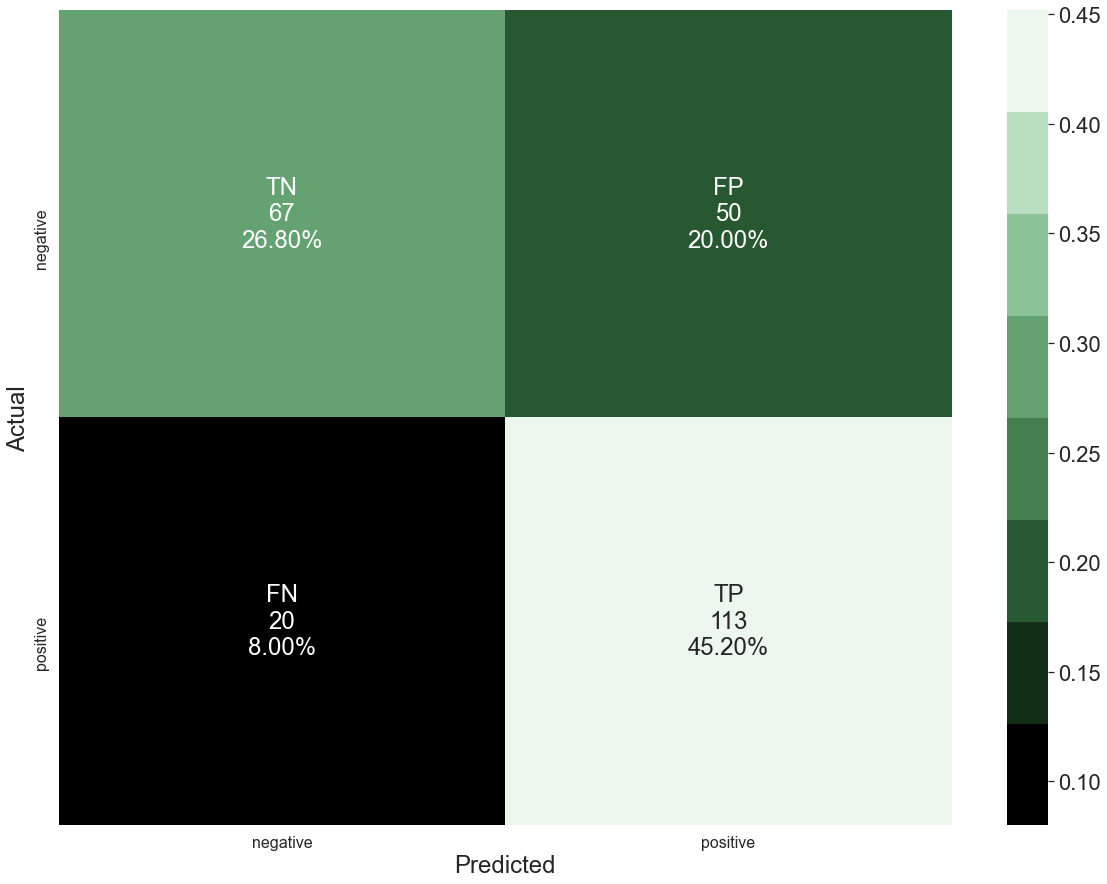

In [83]:
import seaborn as sns

total_predictions = np.sum(confusion_matrix)
print(f'Total predictions:{total_predictions}')
categories_labels = ['negative', 'positive']
plt.figure(figsize=(20,15))

# create seaborn heatmap with required labels, percentages and categories
group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in confusion_matrix.flatten()/total_predictions]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
categories = ['negative','positive']
ax = sns.heatmap(
    data=(confusion_matrix/total_predictions),
    annot=labels,
    fmt='',
    yticklabels=categories,
    xticklabels=categories_labels,
    cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True)
)
sns.set(font_scale=2)
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.show()